Consumer Behavior and Retail Performance Analysis in the Chips Market

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
transactions = pd.read_excel("C:/Users/MUNNA/Downloads/QVI_transaction_data.xlsx")
customers =  pd.read_excel("C:/Users/MUNNA/Downloads/QVI_purchase_behaviour.xlsx")

In [3]:
#Lets look at the first 10 rows of our data
transactions.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
#Lets look at the info of our dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# We can see that the date column is in an integer format. Lets change the format
transactions['DATE'] = pd.to_datetime(transactions['DATE'], origin='1899-12-30', unit='D')

In [6]:
# Product analysis
# Extract words from product names
product_words = transactions['PROD_NAME'].str.split().explode().reset_index()
product_words = product_words.rename(columns={0: 'words'})
product_words

,index,PROD_NAME
0,0,Natural
1,0,Chip
2,0,Compny
3,0,SeaSalt175g
4,1,CCs
...,...,...
1359079,264835,Tostitos
1359080,264835,Splash
1359081,264835,Of
1359082,264835,Lime


In [21]:
# Cleaning words
#As we are only interested in words that will tell us if thre product is chips or not
#Lets remove all the words with digits and special character
product_words = product_words[~product_words['PROD_NAME'].str.contains(r'\d', na=False)]
product_words = product_words[product_words['PROD_NAME'].str.isalpha()]
product_words

,index,PROD_NAME
0,0,Natural
1,0,Chip
2,0,Compny
4,1,CCs
5,1,Nacho
...,...,...
1359077,264834,Jalapeno
1359079,264835,Tostitos
1359080,264835,Splash
1359081,264835,Of


In [7]:
# There are salso products in the dataset but we are only interested in chips category, so lets remove these
transactions = transactions[~transactions['PROD_NAME'].str.lower().str.contains('salsa')]
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [22]:
#Now lets look at the summary of our dataset
transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [ ]:
#As we can see the column PROD_QTY appears to have an outlier which we should investigate further.
#Lets investigate further the case where 200 packets of chips are bought in one transaction

In [9]:
# Handling outliers
outlier_customer = transactions[transactions['PROD_QTY'] == 200]['LYLTY_CARD_NBR'].values[0]
transactions = transactions[transactions['LYLTY_CARD_NBR'] != outlier_customer]
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
transactions.describe()

#Now the data looks better

In [14]:
#Now lets look at the number of transaction lines overtime to see if there are any obvious data issues such as missing data
transactions_by_date = transactions.groupby("DATE").size().reset_index(name = "transaction_count")
transactions_by_date

,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [ ]:
#As we can see there are only 364 days, that means one data is missing. Lets find that in the below code

In [15]:
# Generate full date range
full_date_range = pd.date_range(start="2018-07-01", end="2019-06-30")

# Merge with transaction data
transactions_by_date = transactions_by_date.set_index("DATE").reindex(full_date_range, fill_value=0).reset_index()
transactions_by_date.columns = ["DATE", "transaction_count"]

# Find the missing date
missing_dates = transactions_by_date[transactions_by_date["transaction_count"] == 0]
print(missing_dates)

          DATE  transaction_count
177 2018-12-25                  0


In [18]:
#Now lets look if there are 365 days
transactions_by_date

,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
360,2019-06-26,657
361,2019-06-27,669
362,2019-06-28,673
363,2019-06-29,703


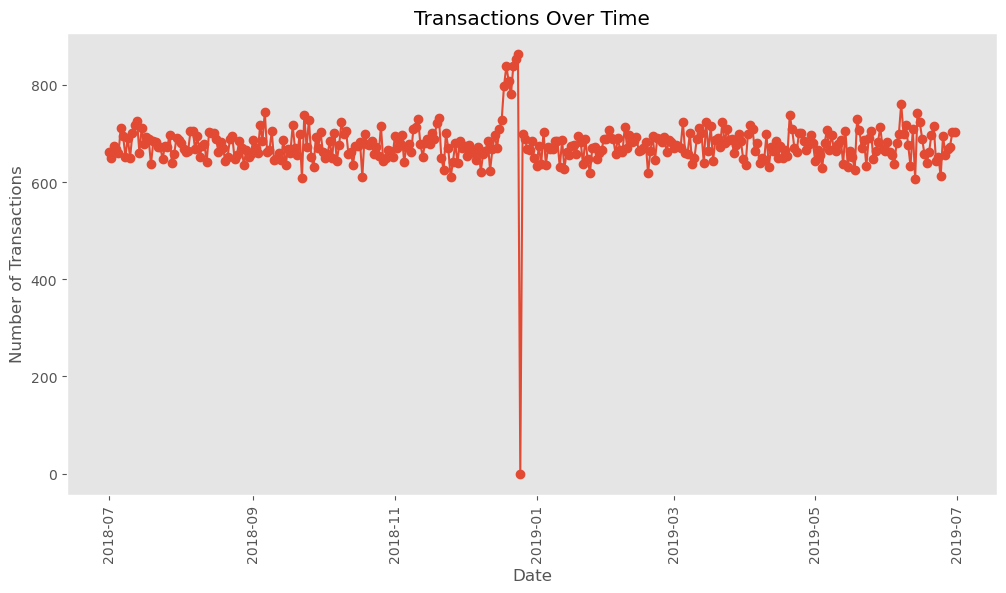

In [35]:
# Plottomg transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date["DATE"], transactions_by_date["transaction_count"], marker="o", linestyle="-")

plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
#We can see that the increase in sales occurs in the lead-up to chritmas and that there are zero sales on the Christmas day itself.
#This is due to shops being closed on Christmas day

#However if see from a tehnical view the  drop value on christmas day is an outlier. 
#However this outlier is valid and makes sense, hence we are not going to remove the datapoint



In [30]:
#Now that we are satisfied that the data no longer has outliers we can move on to creating other features such as brand of chips or pack size from PROD_NAME. we will start with pack size
transactions['PACK_SIZE'] = transactions['PROD_NAME'].str.extract(r'(\d+)').astype(float)

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_25396\4061428853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PACK_SIZE'] = transactions['PROD_NAME'].str.extract(r'(\d+)').astype(float)


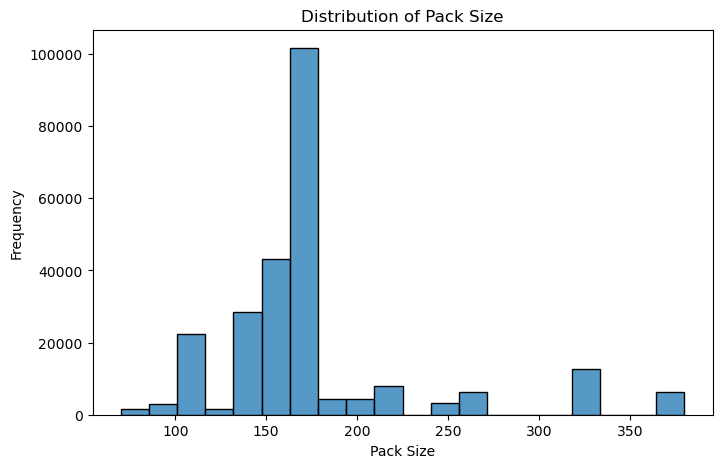

In [34]:
#These below is the graph of packet size
plt.figure(figsize=(8, 5))
sns.histplot(transactions['PACK_SIZE'], bins=20) 
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Distribution of Pack Size')
plt.show()


In [50]:
#Pack size creqated looks reasonable and now to create brands, we can use the first word in PROD_NAME to work out the brand name
transactions['BRAND'] = transactions['PROD_NAME'].str.split().str[0].str.upper()
transactions['BRAND']

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_25396\458725060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['BRAND'] = transactions['PROD_NAME'].str.split().str[0].str.upper()


0          NATURAL
1              CCS
2           SMITHS
3           SMITHS
4           KETTLE
            ...   
264831      KETTLE
264832    TOSTITOS
264833     DORITOS
264834     DORITOS
264835    TOSTITOS
Name: BRAND, Length: 246740, dtype: object

In [51]:
#Some of the brand names look like they are pf the same brand such as SMITH and SMITHS which are both SMITHS brand.
#Lets combine these together
brand_replacements = {
    'RED': 'RRD',
    'SNBTS': 'SUNBITES',
    'INFZNS': 'INFUZIONS',
    'MM': 'MOOLMORTHS',
    'SMITH': 'SMITHS',
    'NCC': 'NATURAL',
    'DORITO': 'DORITOS',
    'GRAIN': 'GRNWVES'
}
transactions['BRAND'] = transactions['BRAND'].replace(brand_replacements)
transactions['BRAND']

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_25396\1821256399.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['BRAND'] = transactions['BRAND'].replace(brand_replacements)


0          NATURAL
1              CCS
2           SMITHS
3           SMITHS
4           KETTLE
            ...   
264831      KETTLE
264832    TOSTITOS
264833     DORITOS
264834     DORITOS
264835    TOSTITOS
Name: BRAND, Length: 246740, dtype: object

In [52]:
# Now that we are happy with the transaction dataset, lets have a look at the customer dataset and merge the two datasets
data = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,TOSTITOS,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITOS,YOUNG SINGLES/COUPLES,Premium


In [ ]:
#And we dont see any issues with the customer dataset.

In [53]:
# Analysis functions
def calculate_metrics(df):
    return pd.Series({
        'SALES': df['TOT_SALES'].sum(),
        'CUSTOMERS': df['LYLTY_CARD_NBR'].nunique(),
        'AVG_UNITS': df['PROD_QTY'].sum() / df['LYLTY_CARD_NBR'].nunique(),
        'AVG_PRICE': df['TOT_SALES'].sum() / df['PROD_QTY'].sum()
    })

In [54]:
# Group by segments
segment_analysis = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(calculate_metrics).reset_index()
segment_analysis

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_25396\3098865113.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_analysis = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(calculate_metrics).reset_index()


,LIFESTAGE,PREMIUM_CUSTOMER,SALES,CUSTOMERS,AVG_UNITS,AVG_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,1474.0,6.026459,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,3298.0,6.432080,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,2369.0,6.078514,3.780823
3,NEW FAMILIES,Budget,20607.45,1087.0,4.821527,3.931969
4,NEW FAMILIES,Mainstream,15979.70,830.0,4.891566,3.935887
5,NEW FAMILIES,Premium,10760.80,575.0,4.815652,3.886168
6,OLDER FAMILIES,Budget,156863.75,4611.0,9.076773,3.747969
7,OLDER FAMILIES,Mainstream,96413.55,2788.0,9.255380,3.736380
8,OLDER FAMILIES,Premium,75242.60,2231.0,9.071717,3.717703
9,OLDER SINGLES/COUPLES,Budget,127833.60,4849.0,6.781398,3.887529


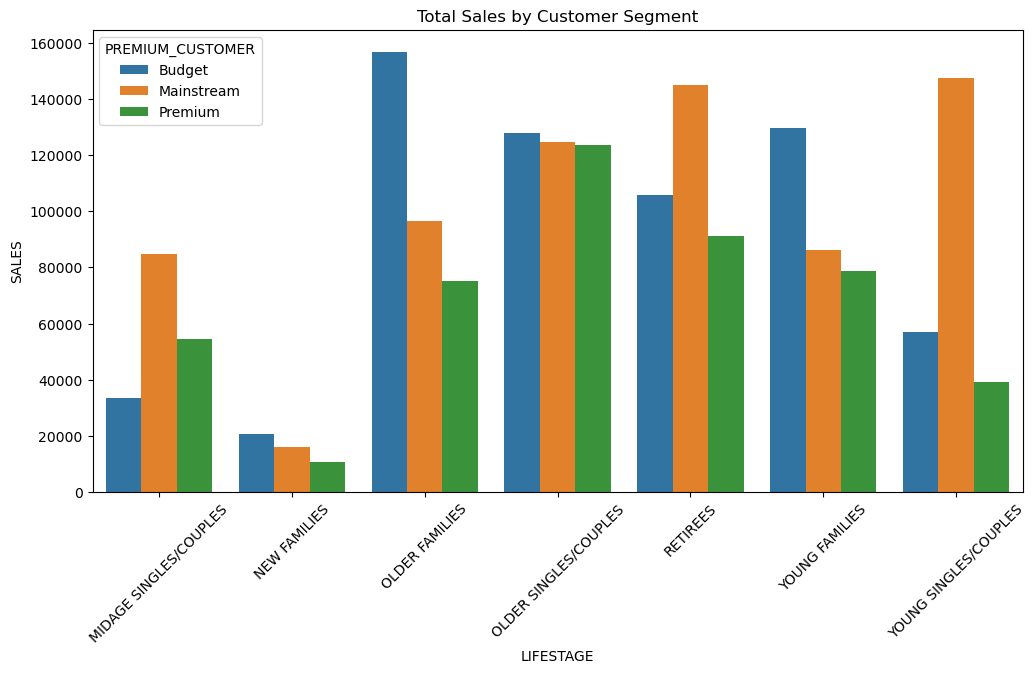

In [55]:
# Plotting example (Total Sales)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='LIFESTAGE',
    y='SALES',
    hue='PREMIUM_CUSTOMER',
    data=segment_analysis
)
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.show()


In [44]:
# Conducting t - test
mainstream = data[
    (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (data['PREMIUM_CUSTOMER'] == 'Mainstream')
]['TOT_SALES'] / data['PROD_QTY']

others = data[
    (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (data['PREMIUM_CUSTOMER'] != 'Mainstream')
]['TOT_SALES'] / data['PROD_QTY']

t_stat, p_value = stats.ttest_ind(mainstream.dropna(), others.dropna())
print(f"T-test results: t={t_stat:.2f}, p={p_value:.4f}")

T-test results: t=37.83, p=0.0000
